Assignment 2 (due on 11/8)

学生：朱昱光 (12332329)

批改人：Zhao Shuhui

得分：45/50

=========================================
# 1 Significant Earthquakes
22/25  
1.1 计算每个国家从BC2150开始的地震死亡人数，并输出最多的10个国家，附上相应人数  5/5  
1.2 计算每年全世界震级大于6.0的地震数量，并画出时间序列，在报告中陈述是否有趋势以及理由——完成了筛选工作；时间序列绘画失误，注意数量为0的年份；报告中没有陈述趋势和理由  7/10  
1.3 创建CountEq_LargestEq方法，要求方法返回 1）给定国家从BC2150开始的地震数量；2）该国家最严重地震的发生日期。对数据集中的所有国家使用该方法，将得到的结果按地震数量从大到小排序 10/10  
代码注意：Sig_Eqs.dropna(1)方法在新版pandas中已不适用;代码中没有import numpy和matplotlib

## 1.1

In [19]:
import pandas as pd
# TA added
import numpy as np
import matplotlib.pyplot as plt

In [16]:
Sig_Eqs=pd.read_csv(r"C:\Program1\jupyter_notebook\ese5023\earthquakes.tsv", sep='\t',header=0,index_col='Id')
Sig_Eqs=Sig_Eqs.drop(columns='Search Parameters')
# Sig_Eqs.dropna(1)
Sig_Eqs=Sig_Eqs.drop(index=np.nan)

In [8]:
total_deaths = Sig_Eqs.groupby('Country')['Deaths'].sum()
sorted_death_counts = total_deaths.sort_values(ascending=False)
top_10_countries = sorted_death_counts.head(10)
print(top_10_countries)

Country
CHINA         2075045.0
TURKEY        1188881.0
IRAN          1011449.0
ITALY          498478.0
SYRIA          439224.0
HAITI          323478.0
AZERBAIJAN     317219.0
JAPAN          279085.0
ARMENIA        191890.0
PAKISTAN       145083.0
Name: Deaths, dtype: float64


## 1.2

In [17]:
eq_big=Sig_Eqs.loc[Sig_Eqs['Mag']>6]
eq_big=eq_big.groupby('Year').size()
total_earthquakes = eq_big.sum()
print(f"地震次数一共有{total_earthquakes}")

地震次数一共有2948


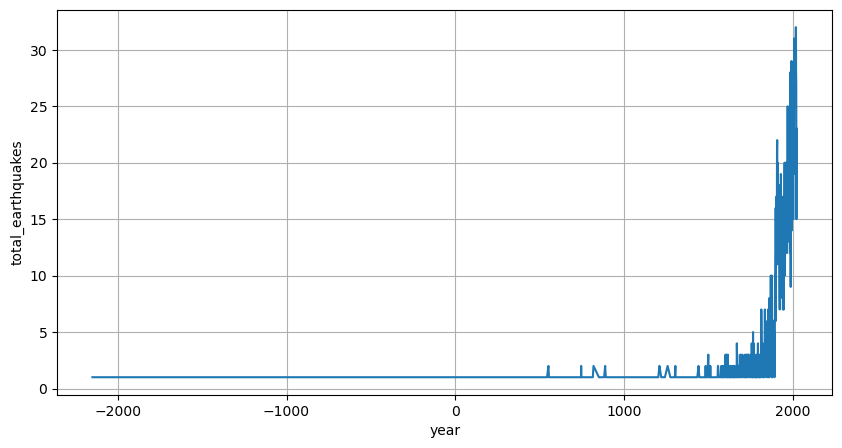

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(eq_big.index, eq_big.values)
plt.xlabel('year')
plt.ylabel('total_earthquakes')

plt.grid(True)
plt.show()

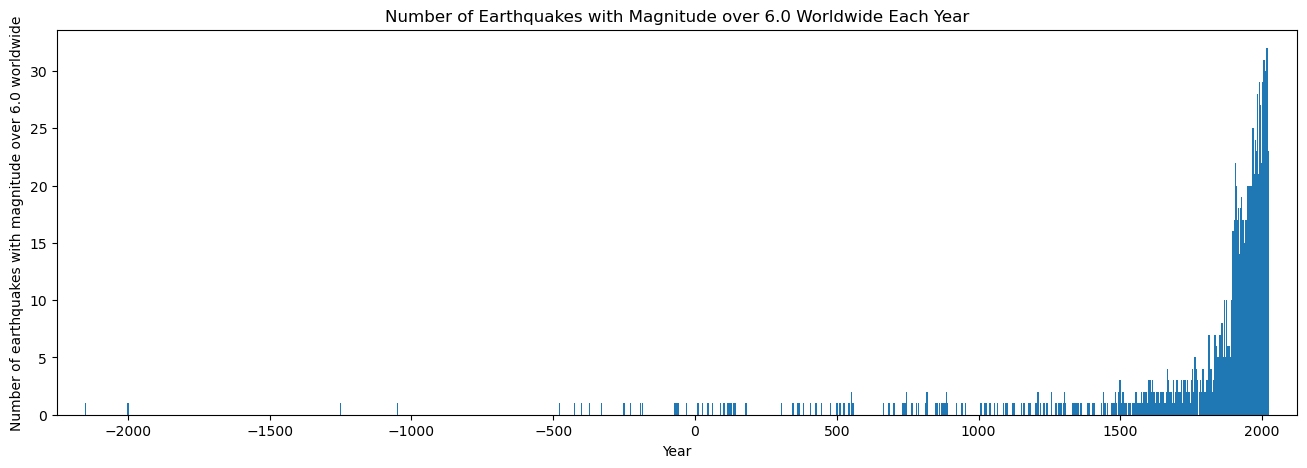

In [21]:
#1.2参考代码
#取Mag大于6的部分，根据年份进行分组，计算每组内有多少个数据
ysigeqs=Sig_Eqs[Sig_Eqs['Mag']>6].groupby(['Year'])['Mag'].count()
yearlist=ysigeqs.index
countlist=ysigeqs
# print(yearlist,countlist)

#设置图像大小，画柱状图，设置x轴范围和x/y坐标轴标签
plt.figure(figsize=(16,5))
plt.bar(yearlist,countlist,width=5)
plt.xlim(yearlist[0]-100,yearlist[-1]+100)
plt.xlabel('Year')
plt.ylabel('Number of earthquakes with magnitude over 6.0 worldwide')
plt.title('Number of Earthquakes with Magnitude over 6.0 Worldwide Each Year')
plt.show()

## 1.3

In [25]:
eq_new = pd.read_csv(r"C:\Program1\jupyter_notebook\ese5023\earthquakes.tsv", sep='\t',header=0,index_col='Id')
eq_new = eq_new.drop(columns='Search Parameters')
eq_new = eq_new.dropna(subset=['Country'])
eq_new.insert(0, 'eq_indexx', 1)

def CountEq_LargestEq(Country):


    every_eq = eq_new.groupby('Country')['eq_indexx'].sum()

    max_magnitude_index = eq_new.groupby('Country')['Mag'].idxmax()
    max_magnitude_index_cleaned = max_magnitude_index.dropna()

    max_earthquake_date = eq_new.loc[max_magnitude_index_cleaned, 'Year']

    if Country in every_eq.index:
        eq_count = every_eq[Country]
        if Country in max_magnitude_index_cleaned.index:
            max_earthquake_year = int(max_earthquake_date[max_earthquake_date.index == max_magnitude_index_cleaned[Country]].values[0])
            
            # 获取最大地震日期
            max_earthquake_month = eq_new.loc[max_magnitude_index_cleaned[Country], 'Mo']
            max_earthquake_day = eq_new.loc[max_magnitude_index_cleaned[Country], 'Dy']

            if not pd.isna(max_earthquake_month) and not pd.isna(max_earthquake_day):
                max_earthquake_month = int(max_earthquake_month)
                max_earthquake_day = int(max_earthquake_day)
                return (Country, eq_count, max_earthquake_year, max_earthquake_month, max_earthquake_day)
            elif not pd.isna(max_earthquake_month):
                max_earthquake_month = int(max_earthquake_month)
                return (Country, eq_count, max_earthquake_year, max_earthquake_month, None)
            else:
                return (Country, eq_count, max_earthquake_year, None, None)
        else:
            return (Country, eq_count, "Data not available", None, None)
    else:
        return None
    
    
    
    
#输入国家 SAINT LUCIA    
CountEq_LargestEq('SAINT LUCIA')


C:\Users\zsh\AppData\Local\Temp\ipykernel_14576\2208113947.py:11: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_magnitude_index = eq_new.groupby('Country')['Mag'].idxmax()
C:\Users\zsh\AppData\Local\Temp\ipykernel_14576\2208113947.py:11: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_magnitude_index = eq_new.groupby('Country')['Mag'].idxmax()
C:\Users\zsh\AppData\Local\Temp\ipykernel_14576\2208113947.py:11: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_magnitude_index = eq_new.groupby('Country')['Mag'].idxmax()
C:\Users\zsh\AppData\Local\Temp\ipykernel_14576\2208113947.py:11: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-N

('SAINT LUCIA', 2, 'Data not available', None, None)

In [26]:
results = []

for country in eq_new['Country'].unique():
    result = CountEq_LargestEq(country)
    if result is not None:  
        results.append(result)

# 将结果整理成一个DataFrame，并按Earthquake Count降序排序
results_df = pd.DataFrame(results, columns=['Country', 'Earthquake Count', 'Max Earthquake Year', 'Max Earthquake Month', 'Max Earthquake Day'])
                         
results_df['Max Earthquake Month'] = results_df['Max Earthquake Month'].astype('Int64')  # 将月份转为整数
results_df['Max Earthquake Day'] = results_df['Max Earthquake Day'].astype('Int64')  # 将日期转为整数
results_df = results_df.sort_values('Earthquake Count', ascending=False).reset_index(drop=True)
display(results_df)


C:\Users\zsh\AppData\Local\Temp\ipykernel_14576\2208113947.py:11: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_magnitude_index = eq_new.groupby('Country')['Mag'].idxmax()
C:\Users\zsh\AppData\Local\Temp\ipykernel_14576\2208113947.py:11: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_magnitude_index = eq_new.groupby('Country')['Mag'].idxmax()
C:\Users\zsh\AppData\Local\Temp\ipykernel_14576\2208113947.py:11: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_magnitude_index = eq_new.groupby('Country')['Mag'].idxmax()
C:\Users\zsh\AppData\Local\Temp\ipykernel_14576\2208113947.py:11: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-N

,Country,Earthquake Count,Max Earthquake Year,Max Earthquake Month,Max Earthquake Day
0,CHINA,620,1668,7,25
1,JAPAN,414,2011,3,11
2,INDONESIA,411,2004,12,26
3,IRAN,384,856,12,22
4,TURKEY,335,1939,12,26
...,...,...,...,...,...
151,NORWAY,1,1819,8,31
152,CENTRAL AFRICAN REPUBLIC,1,1921,9,16
153,PALAU,1,1914,10,23
154,KIRIBATI,1,1905,6,30


=========================================
# 2 Windspeed
8/10  
以时间为x轴画出月平均风速，在报告中回答是否观察到某种趋势；同时在报告中说明你是如何筛选数据的——报告中未汇报观察到的趋势；图表中的变量需标明单位


In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

In [29]:
wd=pd.read_csv(r"C:\Program1\jupyter_notebook\ese5023\2281305.csv")
# 将Date列转换为datetime类型
wd['DATE'] = pd.to_datetime(wd['DATE'])

# 提取月份信息并创建新的列'Month'
wd['Month'] = wd['DATE'].dt.month

# 按照月份分组
grouped = wd.groupby('Month')

# 遍历每个分组
# for name, group in grouped:
#     print(f"Month: {name}")
#     print(group)

C:\Users\zsh\AppData\Local\Temp\ipykernel_14576\2439835807.py:1: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  wd=pd.read_csv(r"C:\Program1\jupyter_notebook\ese5023\2281305.csv")


In [30]:
mask = wd['WND'].str.split(',', expand=True)[3] == '9999'

result = wd[mask]
result

,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AJ1,...,OD2,QUALITY_CONTROL.1,REM,REPORT_TYPE.1,SLP,SOURCE.1,TMP,VIS,WND,Month
29394,59493099999,2013-05-10 21:00:00,4,FM-12,99999,V020,"24,0022,3,1",NaN,NaN,NaN,...,NaN,V020,SYN06459493 41540 60000 10231 20228 40061 5700...,FM-12,"10061,1",4,"+0231,1","004000,1,9,9","999,9,C,9999,9",5
29398,59493099999,2013-05-11 00:00:00,4,FM-12,99999,V020,"24,0022,3,1",NaN,NaN,NaN,...,NaN,V020,SYN07059493 31456 80000 10244 20230 40070 5200...,FM-12,"10070,1",4,"+0244,1","006000,1,9,9","999,9,C,9999,9",5
29582,59493099999,2013-05-16 18:00:00,4,FM-12,99999,V020,NaN,NaN,NaN,NaN,...,NaN,V020,SYN05859493 32665 70000 10255 20243 40071 5701...,FM-12,"10071,1",4,"+0255,1","015000,1,9,9","999,9,C,9999,9",5
29606,59493099999,2013-05-17 12:00:00,4,FM-12,99999,V020,NaN,NaN,NaN,NaN,...,NaN,V020,SYN05459493 32560 70000 10275 20255 39998 4007...,FM-12,"10071,1",4,"+0275,1","010000,1,9,9","999,9,C,9999,9",5
29726,59493099999,2013-05-21 06:00:00,4,FM-12,99999,V020,"06,0170,3,1",NaN,NaN,NaN,...,NaN,V020,SYN08259493 11468 80000 10236 20233 40046 5701...,FM-12,"10046,1",4,"+0236,1","018000,1,9,9","999,9,C,9999,9",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104321,59493099999,2019-11-18 00:00:00,4,FM-12,99999,V020,NaN,NaN,NaN,NaN,...,NaN,V020,SYN05259493 32959 00000 10218 20204 40164 5201...,FM-12,"10164,1",4,"+0218,1","009000,1,9,9","999,9,C,9999,9",11
104463,59493099999,2019-11-22 12:00:00,4,FM-12,99999,V020,NaN,NaN,NaN,NaN,...,NaN,V020,SYN04259493 32980 00000 10218 20139 40170 52018=,FM-12,"10170,1",4,"+0218,1","030000,1,9,9","999,9,C,9999,9",11
104471,59493099999,2019-11-22 18:00:00,4,FM-12,99999,V020,NaN,NaN,NaN,NaN,...,NaN,V020,SYN05259493 32/80 90000 10202 20162 40162 5700...,FM-12,"10162,1",4,"+0202,1","030000,1,9,9","999,9,C,9999,9",11
104513,59493099999,2019-11-24 06:00:00,4,FM-12,99999,V020,NaN,NaN,NaN,NaN,...,NaN,V020,SYN05859493 32580 60000 10281 20163 40161 5702...,FM-12,"10161,1",4,"+0281,1","030000,1,9,9","999,9,C,9999,9",11


In [31]:
wnd_split = wd['WND'].str.split(',', expand=True)

# 查找第一个数据为999并且第二个数据为9的行
condition=(wnd_split[2] == 'C') &(wnd_split[3] == '0000')

result = wd[condition]

# 显示结果为表格形式
display(result)

,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AJ1,...,OD2,QUALITY_CONTROL.1,REM,REPORT_TYPE.1,SLP,SOURCE.1,TMP,VIS,WND,Month
2,59493099999,2010-01-02 02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET068METAR ZGSZ 020200Z 00000MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002600,1,N,1","999,9,C,0000,1",1
25,59493099999,2010-01-03 01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET065METAR ZGSZ 030100Z 00000MPS 8000 SCT013 ...,FM-15,"99999,9",4,"+0160,1","008000,1,N,1","999,9,C,0000,1",1
89,59493099999,2010-01-05 17:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET072METAR ZGSZ 051700Z 00000MPS 3000 -RA BR ...,FM-15,"99999,9",4,"+0170,1","003000,1,N,1","999,9,C,0000,1",1
170,59493099999,2010-01-09 02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET061METAR ZGSZ 090200Z 00000MPS 5000 BR OVC0...,FM-15,"99999,9",4,"+0130,1","005000,1,N,1","999,9,C,0000,1",1
283,59493099999,2010-01-13 19:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET055METAR ZGSZ 131900Z 00000MPS 6000 NSC 12/...,FM-15,"99999,9",4,"+0120,1","006000,1,N,1","999,9,C,0000,1",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111301,59493099999,2020-08-14 23:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET058METAR ZGSZ 142300Z 00000MPS 9999 SCT020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","999,9,C,0000,1",8
111469,59493099999,2020-08-21 21:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET052METAR ZGSZ 212100Z 00000MPS CAVOK 28/26 ...,FM-15,"99999,9",4,"+0280,1","009900,5,9,9","999,9,C,0000,1",8
111471,59493099999,2020-08-21 23:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET055METAR ZGSZ 212300Z 00000MPS 6000 NSC 28/...,FM-15,"99999,9",4,"+0280,1","006000,1,9,9","999,9,C,0000,1",8
111644,59493099999,2020-08-28 23:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET052METAR ZGSZ 282300Z 00000MPS CAVOK 29/27 ...,FM-15,"99999,9",4,"+0290,1","009900,5,9,9","999,9,C,0000,1",8


In [32]:
wd_copy = wd.copy()
wd_copy['WND_4th_value'] = wd_copy['WND'].str.split(',').str[3]
wd_copy = wd_copy[wd_copy['WND_4th_value'] != '9999']
wd_copy.drop(columns='WND_4th_value', inplace=True)
wd_copy

,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AJ1,...,OD2,QUALITY_CONTROL.1,REM,REPORT_TYPE.1,SLP,SOURCE.1,TMP,VIS,WND,Month
0,59493099999,2010-01-02 00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,2,1","24,0000,2,1",NaN,NaN,...,NaN,V020,SYN088AAXX 02001 59493 11740 80402 10161 2013...,SY-MT,"10161,1",4,"+0161,1","004000,1,N,1","040,1,N,0020,1",1
1,59493099999,2010-01-02 01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET068METAR ZGSZ 020100Z VRB01MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0170,1","002600,1,N,1","999,9,V,0010,1",1
2,59493099999,2010-01-02 02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET068METAR ZGSZ 020200Z 00000MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002600,1,N,1","999,9,C,0000,1",1
3,59493099999,2010-01-02 03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,V020,SYN066AAXX 02031 59493 41750 81401 10192 2014...,SY-MT,"10169,1",4,"+0192,1","005000,1,N,1","140,1,N,0010,1",1
4,59493099999,2010-01-02 04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET068METAR ZGSZ 020400Z 30004MPS 2100 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002100,1,N,1","300,1,N,0040,1",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111979,59493099999,2020-09-11 17:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET058METAR ZGSZ 111700Z 17003MPS 9999 BKN020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","170,1,N,0030,1",9
111980,59493099999,2020-09-11 18:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET058METAR ZGSZ 111800Z 18004MPS 9999 BKN020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","180,1,N,0040,1",9
111981,59493099999,2020-09-11 19:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET088METAR ZGSZ 111900Z 22003MPS 200V260 9999...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","220,1,V,0030,1",9
111982,59493099999,2020-09-11 20:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET067METAR ZGSZ 112000Z 26003MPS 9999 SCT020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","260,1,N,0030,1",9


In [33]:
duplicated_dates = wd_copy[wd_copy['DATE'].duplicated(keep=False)]
duplicated_dates

,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AJ1,...,OD2,QUALITY_CONTROL.1,REM,REPORT_TYPE.1,SLP,SOURCE.1,TMP,VIS,WND,Month
29078,59493099999,2013-05-01 00:00:00,4,FM-12,99999,V020,"24,0296,3,1",NaN,NaN,NaN,...,NaN,V020,SYN07059493 31557 10201 10232 20203 40094 5201...,FM-12,"10094,1",4,"+0232,1","007000,1,9,9","020,1,N,0010,1",5
29079,59493099999,2013-05-01 00:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET066METAR ZGSZ 010000Z 02005MPS 360V060 9999...,FM-15,"99999,9",4,"+0240,1","009999,1,9,9","020,1,V,0050,1",5
29082,59493099999,2013-05-01 03:00:00,4,FM-12,99999,V020,NaN,NaN,NaN,NaN,...,NaN,V020,SYN04859493 42570 70204 10246 20190 40103 5200...,FM-12,"10103,1",4,"+0246,1","020000,1,9,9","020,1,N,0040,1",5
29083,59493099999,2013-05-01 03:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET066METAR ZGSZ 010300Z 07005MPS 030V090 9999...,FM-15,"99999,9",4,"+0260,1","009999,1,9,9","070,1,V,0050,1",5
29086,59493099999,2013-05-01 06:00:00,4,FM-12,99999,V020,NaN,NaN,NaN,NaN,...,NaN,V020,SYN05859493 32563 70903 10232 20198 40094 5700...,FM-12,"10094,1",4,"+0232,1","013000,1,9,9","090,1,N,0030,1",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111861,59493099999,2020-09-06 21:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET052METAR ZGSZ 062100Z 09002MPS CAVOK 28/25 ...,FM-15,"99999,9",4,"+0280,1","009900,5,9,9","090,1,N,0020,1",9
111954,59493099999,2020-09-10 18:00:00,4,FM-12,99999,V020,"06,0000,9,1","12,0100,3,1","24,0326,3,1",NaN,...,NaN,V020,SYN12459493 04980 /1001 10270 20264 39997 4007...,FM-12,"10070,1",4,"+0270,1","030000,1,9,9","100,1,N,0010,1",9
111955,59493099999,2020-09-10 18:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET073METAR ZGSZ 101800Z 18004MPS 9999 -SHRA S...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","180,1,N,0040,1",9
111958,59493099999,2020-09-10 21:00:00,4,FM-12,99999,V020,"06,0000,9,1","12,0100,3,1","24,0325,3,1",NaN,...,NaN,V020,SYN12459493 04980 /0801 10267 20263 39998 4007...,FM-12,"10071,1",4,"+0267,1","030000,1,9,9","080,1,N,0010,1",9


In [34]:
wd_copy['WND_4th_value'] = wd_copy['WND'].str.split(',').str[3].astype(float)

# 按DATE分组并求平均
average_wnd_by_date = wd_copy.groupby('DATE')['WND_4th_value'].mean().reset_index()
average_wnd_by_date 
# print(len(average_wnd_by_date))

,DATE,WND_4th_value
0,2010-01-02 00:00:00,20.0
1,2010-01-02 01:00:00,10.0
2,2010-01-02 02:00:00,0.0
3,2010-01-02 03:00:00,10.0
4,2010-01-02 04:00:00,40.0
...,...,...
92665,2020-09-11 17:00:00,30.0
92666,2020-09-11 18:00:00,40.0
92667,2020-09-11 19:00:00,30.0
92668,2020-09-11 20:00:00,30.0


In [35]:
# 假设你的数据框叫做df
# 转换"DATE"列为datetime格式
average_wnd_by_date['DATE'] = pd.to_datetime(average_wnd_by_date['DATE'])



# 计算每月的平均风速

monthly_avg = average_wnd_by_date.resample('M', on='DATE').mean()
monthly_avg['WND_4th_value'] = monthly_avg['WND_4th_value'] / 10
monthly_avg.index = monthly_avg.index.strftime('%Y-%m')
print(monthly_avg)

         WND_4th_value
DATE                  
2010-01       2.756267
2010-02       3.388060
2010-03       3.360700
2010-04       3.191341
2010-05       3.293640
...                ...
2020-05       4.361694
2020-06       5.576602
2020-07       5.463342
2020-08       3.743611
2020-09       3.104389

[129 rows x 1 columns]


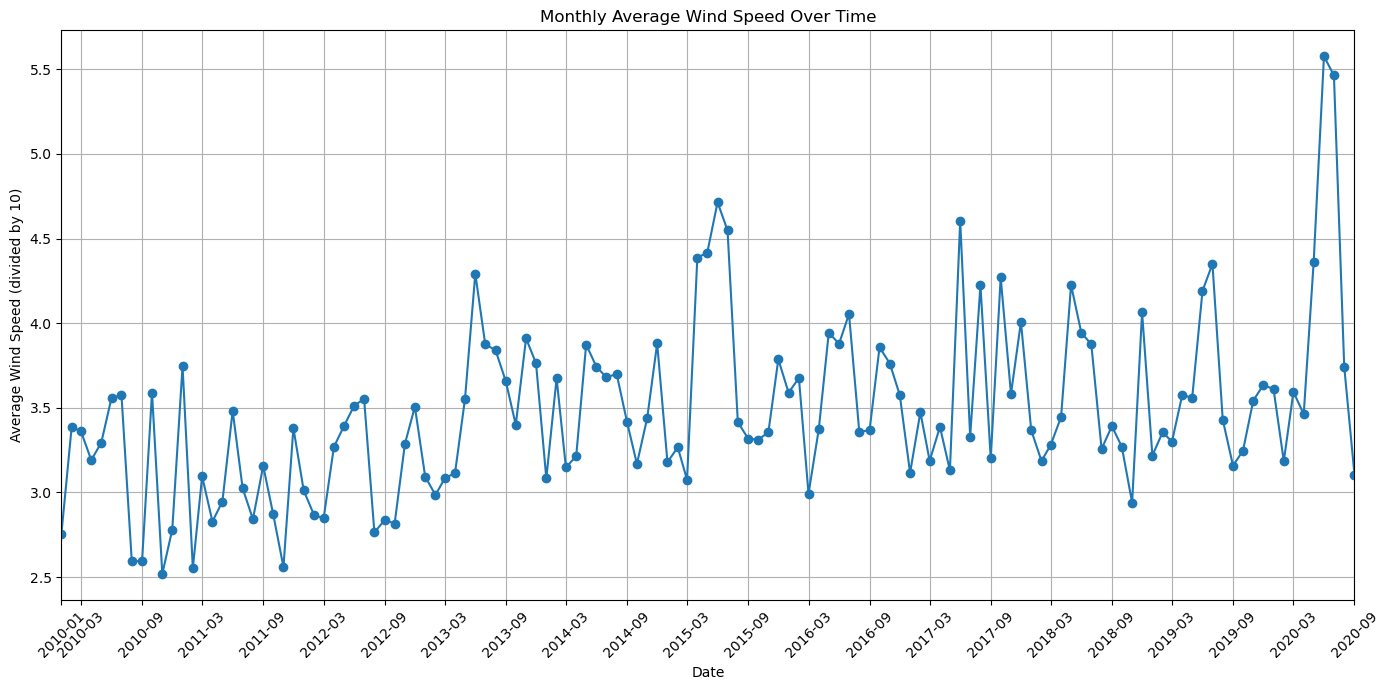

In [36]:
monthly_avg.index = pd.to_datetime(monthly_avg.index)
plt.figure(figsize=(14,7))

# 绘制时间序列图
plt.plot(monthly_avg.index, monthly_avg['WND_4th_value'], marker='o', linestyle='-')

# 设置标题和标签
plt.title('Monthly Average Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Average Wind Speed (divided by 10)')

# 设置x轴的间隔和格式
ax = plt.gca()  # 获取当前的坐标轴
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # 设置每6个月显示一个标签
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 设置日期格式

# 获取当前x轴的标签，并添加'2010-01'和'2020-09'
current_labels = list(ax.get_xticks())
new_labels = sorted(set(current_labels + [mdates.date2num(pd.to_datetime('2010-01')), mdates.date2num(pd.to_datetime('2020-09'))]))
ax.set_xticks(new_labels)

plt.xticks(rotation=45)  # 旋转x轴标签，使其更易读

# 显示图形
start_date = pd.to_datetime('2010-01')
end_date = pd.to_datetime('2020-09')
plt.xlim([start_date, end_date])
plt.tight_layout()
plt.grid(True)
plt.show()

=========================================
# 3 Free Exploration
15/15  
3.1 读取csv/xls/xlsx文件，并清理缺失/低质量数据 5/5  
3.2 画出某个变量的时间序列——注意图表需标明变量的单位  5/5  
3.3 对该变量进行至少5种简单的统计检验，并在报告中汇报你的发现——没有在报告中汇报分析  4/5  
统计工作完成得较好，图表元素丰富 +1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
USC_da=pd.read_csv(r"C:\Program1\jupyter_notebook\ese5023\ESE5023_Assignments_12332329\hw2-朱昱光-12332329\USC00129222.csv")
USC_da['DATE'] = pd.to_datetime(USC_da['DATE'], format='%b-%y')
current_year = pd.Timestamp.now().year
USC_da['DATE'] = USC_da['DATE'].apply(lambda x: x if x.year <= current_year else x.replace(year=x.year-100))
USC_da


,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,...,SNOW,SNOW_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,WDMV,WDMV_ATTRIBUTES
0,USC00129222,1961-01-01,41.4439,-86.9294,224,"WANATAH 2 WNW, IN US",0.0,0.0,0.0,",0",...,189.0,",,,0",-6.73,",0",-1.61,",,,0",-11.85,",,,0",NaN,NaN
1,USC00129222,1961-02-01,41.4439,-86.9294,224,"WANATAH 2 WNW, IN US",0.0,0.0,0.0,",0",...,205.0,",,,0",-1.59,",0",3.76,",,,0",-6.94,",,,0",NaN,NaN
2,USC00129222,1961-03-01,41.4439,-86.9294,224,"WANATAH 2 WNW, IN US",0.0,0.0,0.0,"1,0",...,89.0,",,,0",3.91,"1,0",8.98,"1,,,0",-1.15,",,,0",NaN,NaN
3,USC00129222,1961-04-01,41.4439,-86.9294,224,"WANATAH 2 WNW, IN US",0.0,0.0,0.0,",0",...,207.0,",,,0",5.50,",0",10.31,",,,0",0.70,",,,0",NaN,NaN
4,USC00129222,1961-05-01,41.4439,-86.9294,224,"WANATAH 2 WNW, IN US",8.1,0.0,8.1,",0",...,0.0,",,,0",12.13,",0",18.84,",,,0",5.43,",,,0",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,USC00129222,2023-05-01,41.4439,-86.9294,224,"WANATAH 2 WNW, IN US",28.1,NaN,26.1,",7",...,0.0,",,,7",15.89,",7",22.42,",,,7",9.36,",,,7",NaN,NaN
738,USC00129222,2023-06-01,41.4439,-86.9294,224,"WANATAH 2 WNW, IN US",108.0,NaN,79.9,",7",...,0.0,",,,7",20.04,",7",26.17,",,,7",13.91,",,,7",NaN,NaN
739,USC00129222,2023-07-01,41.4439,-86.9294,224,"WANATAH 2 WNW, IN US",207.2,NaN,99.2,"1,7",...,0.0,",,,7",21.51,"1,7",27.33,"1,,,7",15.69,"1,,,7",NaN,NaN
740,USC00129222,2023-08-01,41.4439,-86.9294,224,"WANATAH 2 WNW, IN US",297.6,NaN,90.4,",7",...,0.0,",,,7",20.95,",7",26.58,",,,7",15.31,",,,7",NaN,NaN


In [3]:
USC_da_drop = USC_da.copy()
USC_da_drop =USC_da_drop.dropna(subset=['CLDD'])
USC_da_drop

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,...,SNOW,SNOW_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,WDMV,WDMV_ATTRIBUTES
0,USC00129222,1961-01-01,41.4439,-86.9294,224,"WANATAH 2 WNW, IN US",0.0,0.0,0.0,",0",...,189.0,",,,0",-6.73,",0",-1.61,",,,0",-11.85,",,,0",NaN,NaN
1,USC00129222,1961-02-01,41.4439,-86.9294,224,"WANATAH 2 WNW, IN US",0.0,0.0,0.0,",0",...,205.0,",,,0",-1.59,",0",3.76,",,,0",-6.94,",,,0",NaN,NaN
2,USC00129222,1961-03-01,41.4439,-86.9294,224,"WANATAH 2 WNW, IN US",0.0,0.0,0.0,"1,0",...,89.0,",,,0",3.91,"1,0",8.98,"1,,,0",-1.15,",,,0",NaN,NaN
3,USC00129222,1961-04-01,41.4439,-86.9294,224,"WANATAH 2 WNW, IN US",0.0,0.0,0.0,",0",...,207.0,",,,0",5.50,",0",10.31,",,,0",0.70,",,,0",NaN,NaN
4,USC00129222,1961-05-01,41.4439,-86.9294,224,"WANATAH 2 WNW, IN US",8.1,0.0,8.1,",0",...,0.0,",,,0",12.13,",0",18.84,",,,0",5.43,",,,0",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,USC00129222,2023-05-01,41.4439,-86.9294,224,"WANATAH 2 WNW, IN US",28.1,NaN,26.1,",7",...,0.0,",,,7",15.89,",7",22.42,",,,7",9.36,",,,7",NaN,NaN
738,USC00129222,2023-06-01,41.4439,-86.9294,224,"WANATAH 2 WNW, IN US",108.0,NaN,79.9,",7",...,0.0,",,,7",20.04,",7",26.17,",,,7",13.91,",,,7",NaN,NaN
739,USC00129222,2023-07-01,41.4439,-86.9294,224,"WANATAH 2 WNW, IN US",207.2,NaN,99.2,"1,7",...,0.0,",,,7",21.51,"1,7",27.33,"1,,,7",15.69,"1,,,7",NaN,NaN
740,USC00129222,2023-08-01,41.4439,-86.9294,224,"WANATAH 2 WNW, IN US",297.6,NaN,90.4,",7",...,0.0,",,,7",20.95,",7",26.58,",,,7",15.31,",,,7",NaN,NaN


In [4]:
# 提取年份，并按年份进行分组，然后计算CLDD的平均值
USC_da_drop['YEAR'] = USC_da_drop['DATE'].dt.year
avg_rainfall = USC_da_drop.groupby('YEAR')['CLDD'].mean().reset_index()
avg_rainfall 

,YEAR,CLDD
0,1961,31.883333
1,1962,31.925000
2,1963,29.458333
3,1964,37.775000
4,1965,30.000000
...,...,...
58,2019,33.766667
59,2020,36.983333
60,2021,43.158333
61,2022,36.708333


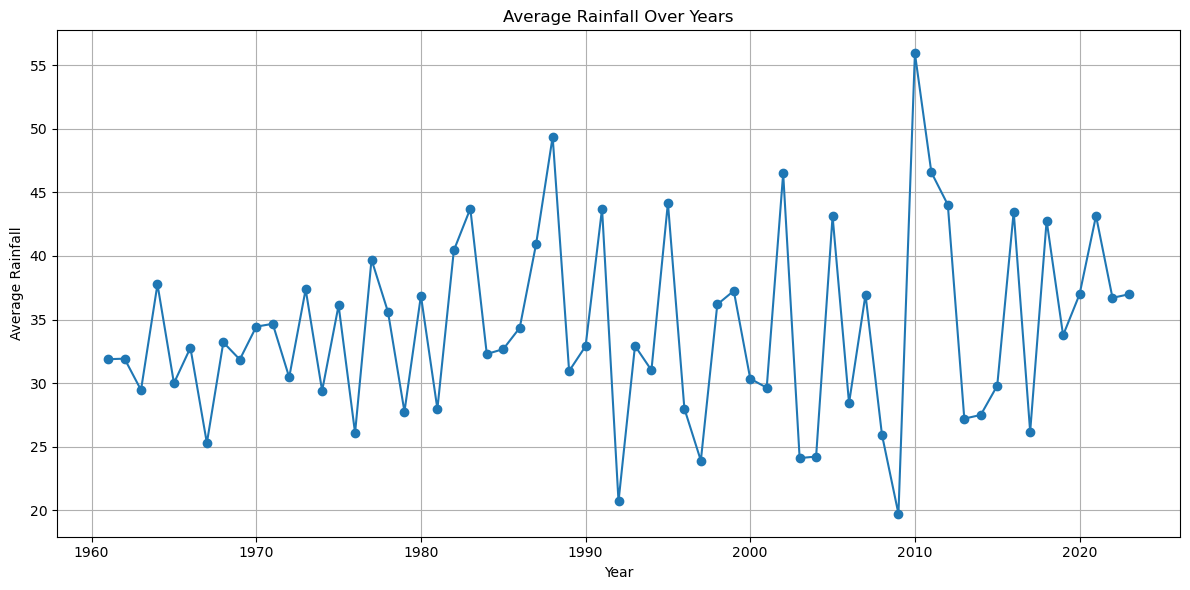

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(avg_rainfall['YEAR'], avg_rainfall['CLDD'], marker='o', linestyle='-')
plt.title('Average Rainfall Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rainfall')
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# 从数据框中计算CLDD列的均值
mean_cldd = avg_rainfall['CLDD'].mean()

# 从数据框中计算CLDD列的中位数
median_cldd = avg_rainfall['CLDD'].median()

# 从数据框中计算CLDD列的标准偏差
std_cldd = avg_rainfall['CLDD'].std()

# 从数据框中找出CLDD列的最小值
min_cldd = avg_rainfall['CLDD'].min()

# 从数据框中找出CLDD列的最大值
max_cldd = avg_rainfall['CLDD'].max()

# 从数据框中计算CLDD列的第一四分位数（即25%分位数）
q1_cldd = avg_rainfall['CLDD'].quantile(0.25)

# 从数据框中计算CLDD列的第三四分位数（即75%分位数）
q3_cldd = avg_rainfall['CLDD'].quantile(0.75)

# 打印上述计算得到的统计量
print(f"Mean CLDD: {mean_cldd}")
print(f"Median CLDD: {median_cldd}")
print(f"Standard Deviation of CLDD: {std_cldd}")
print(f"Minimum CLDD: {min_cldd}")
print(f"Maximum CLDD: {max_cldd}")
print(f"First Quartile (25th percentile) of CLDD: {q1_cldd}")
print(f"Third Quartile (75th percentile) of CLDD: {q3_cldd}")





Mean CLDD: 34.22744268077603
Median CLDD: 32.93333333333333
Standard Deviation of CLDD: 7.297599422028378
Minimum CLDD: 19.73333333333333
Maximum CLDD: 55.93333333333333
First Quartile (25th percentile) of CLDD: 29.429166666666667
Third Quartile (75th percentile) of CLDD: 37.575


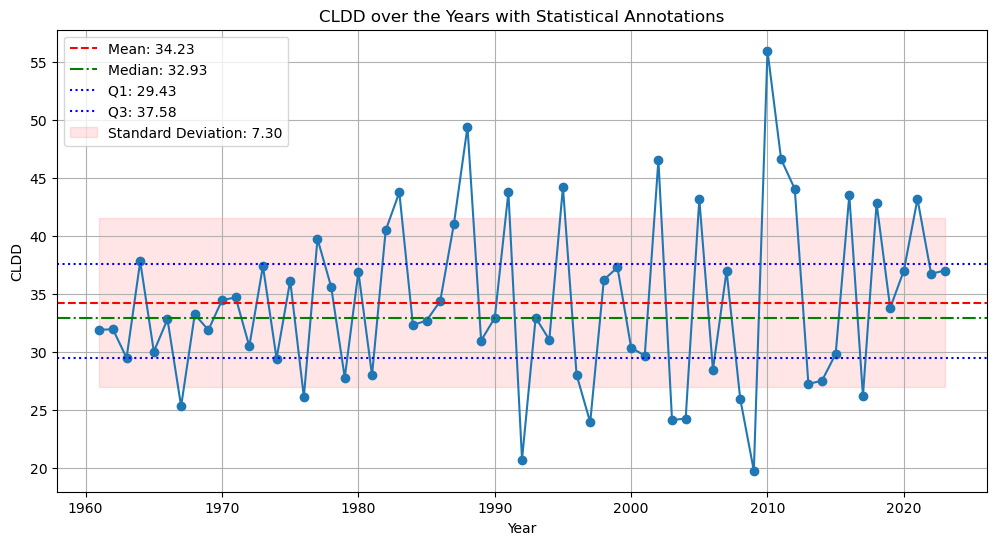

In [7]:
# 计算均值
mean_cldd = avg_rainfall['CLDD'].mean()

# 计算中位数
median_cldd = avg_rainfall['CLDD'].median()

# 计算标准偏差
std_cldd = avg_rainfall['CLDD'].std()

# 计算最小值
min_cldd = avg_rainfall['CLDD'].min()

# 计算最大值
max_cldd = avg_rainfall['CLDD'].max()

# 计算第一四分位数
q1_cldd = avg_rainfall['CLDD'].quantile(0.25)

# 计算第三四分位数
q3_cldd = avg_rainfall['CLDD'].quantile(0.75)

# 绘图
plt.figure(figsize=(12,6))

# 绘制时间序列图
plt.plot(avg_rainfall['YEAR'], avg_rainfall['CLDD'], marker='o', linestyle='-')

# 绘制均值线
plt.axhline(mean_cldd, color='red', linestyle='--', label=f'Mean: {mean_cldd:.2f}')

# 绘制中位数线
plt.axhline(median_cldd, color='green', linestyle='-.', label=f'Median: {median_cldd:.2f}')

# 绘制第一和第三四分位数线
plt.axhline(q1_cldd, color='blue', linestyle=':', label=f'Q1: {q1_cldd:.2f}')
plt.axhline(q3_cldd, color='blue', linestyle=':', label=f'Q3: {q3_cldd:.2f}')

# 绘制均值的标准偏差范围
plt.fill_between(avg_rainfall['YEAR'], mean_cldd-std_cldd, mean_cldd+std_cldd, color='red', alpha=0.1, label=f'Standard Deviation: {std_cldd:.2f}')

# 添加标题和坐标轴标签
plt.title('CLDD over the Years with Statistical Annotations')
plt.xlabel('Year')
plt.ylabel('CLDD')

# 显示图例
plt.legend()

# 显示网格
plt.grid(True)

# 展示图形
plt.show()